### Part 2 - Regression Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from test import data_prep

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [2]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 110, max 238, mean 171.82 and std dev 10.95
Variable #1: min 44, max 180, mean 84.45 and std dev 23.93
Variable #2: min 0, max 1, mean 0.89 and std dev 0.31
Variable #3: min 0, max 1, mean 0.10 and std dev 0.31
Variable #4: min 0, max 21, mean 7.68 and std dev 6.55
After scaling
-------------
Variable #0: min -5.646019606867985, max 6.04457824596458, mean -0.00 and std dev 1.00
Variable #1: min -1.6903772697732775, max 3.992266536727259, mean -0.00 and std dev 1.00
Variable #2: min -2.905426148390667, max 0.34418358923142583, mean 0.00 and std dev 1.00
Variable #3: min -0.3403471164356589, max 2.9381767957159473, mean 0.00 and std dev 1.00
Variable #4: min -1.1717606550676136, max 2.0342595952204983, mean -0.00 and std dev 1.00


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [5]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7208323591302315
Test accuracy: 0.6988543371522095
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1070
           1       0.66      0.58      0.61       763

    accuracy                           0.70      1833
   macro avg       0.69      0.68      0.68      1833
weighted avg       0.70      0.70      0.70      1833



In [6]:
print(model.coef_)

[[-0.25952016  0.32119384  0.12812985 -0.12295325 -0.02224027  0.23694197
  -0.07270654  0.06400769  0.0897964  -0.04638758  0.23583433 -0.05331134
   0.09394539  0.04071686 -0.07314382  0.01648235 -0.1506039  -0.09385934
   0.15939346  0.21865768 -0.04695979  0.06686595 -0.02044334 -0.03096682
   0.01037031  0.00344663 -0.03473082 -0.01276089  0.04443712  0.04400707
  -0.34261742  0.02249763  0.3028883  -0.05487832 -0.01873686  0.03421187
  -0.00127789  0.02801516  0.01138185 -0.02860118  0.01031977  0.01910771
  -0.02207415 -0.00338368  0.00828456  0.00318192  0.05591086  0.0750367
   0.00617402  0.05406055  0.01454405  0.04062629  0.02109983  0.0035591
   0.00871863  0.04868589 -0.13608439  0.01735641 -0.0401244   0.02561788
  -0.0105956   0.04425754  0.00733429 -0.10055387  0.01238761 -0.04992045
   0.16263642 -0.0722524   0.01451059 -0.01420331 -0.12112612  0.19608823
  -0.16419838]]


In [7]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:50]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

height : -0.2595201639818025
weight : 0.32119383865558215
insurance : 0.12812985465719728
immigrant : -0.12295324991997002
contacts_count : -0.022240265049733525
house_count : 0.23694196760867645
gender_female : -0.07270653555465734
gender_male : 0.06400768710996937
gender_other : 0.0897964041442842
age_0_10 : -0.046387582152975865
age_100_110 : 0.23583433043334603
age_10_20 : -0.05331134201530121
age_20_30 : 0.09394538768680286
age_30_40 : 0.04071686415165726
age_40_50 : -0.0731438172273233
age_50_60 : 0.016482345778457905
age_60_70 : -0.15060390417640585
age_70_80 : -0.09385934483346266
age_80_90 : 0.1593934629050543
age_90_100 : 0.21865767785101398
blood_type_abn : -0.04695978583484142
blood_type_abp : 0.066865949838356
blood_type_an : -0.020443340859172075
blood_type_ap : -0.03096681671661943
blood_type_bn : 0.010370314472429651
blood_type_bp : 0.003446629266259633
blood_type_on : -0.034730818797493415
blood_type_op : -0.012760894964218504
blood_type_unknown : 0.04443711845810461
i

In [8]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

income_high : -0.3426174244121577
weight : 0.32119383865558215
income_med : 0.30288829753036395
height : -0.2595201639818025
house_count : 0.23694196760867645
age_100_110 : 0.23583433043334603
age_90_100 : 0.21865767785101398
worried_4 : 0.19608822954643818
worried_5 : -0.16419837782426303
working_travel critical : 0.1626364163233923
age_80_90 : 0.1593934629050543
age_60_70 : -0.15060390417640585
alcohol_3.013200498 : -0.1360843915213408
insurance : 0.12812985465719728
immigrant : -0.12295324991997002
worried_3 : -0.12112611847622434
working_home : -0.10055386929889876
age_20_30 : 0.09394538768680286
age_70_80 : -0.09385934483346266
gender_other : 0.0897964041442842


In [9]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [10]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.01136255, 0.01226108, 0.00717173, 0.00725121, 0.00777068,
       0.00950248, 0.0116266 , 0.01371193, 0.01388481, 0.01515968]), 'std_fit_time': array([0.00304724, 0.00368313, 0.00182319, 0.00068145, 0.00073853,
       0.00044065, 0.00299725, 0.00537156, 0.00349626, 0.0042905 ]), 'mean_score_time': array([0.00040259, 0.00041616, 0.00029483, 0.00031798, 0.00028532,
       0.00028851, 0.00030484, 0.00028579, 0.00028856, 0.00030496]), 'std_score_time': array([1.33609193e-04, 2.01361203e-04, 8.65180257e-06, 8.19789067e-05,
       2.31214522e-05, 2.75576092e-05, 9.21219402e-05, 1.98661628e-05,
       1.95991239e-05, 7.59908085e-05]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

Total number of models:  10


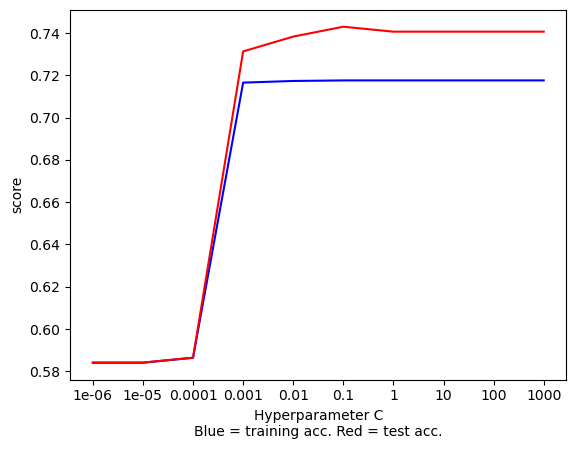

In [11]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


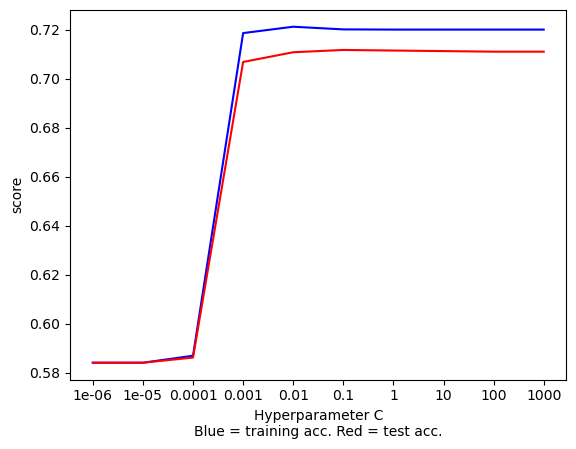

In [12]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [13]:
print(cv.best_params_)

{'C': 0.1}


In [14]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.7215337853635726
Test accuracy: 0.6999454446262957


#### Feature Selection 

In [15]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 73
Number of features after elimination 45


RFECV(cv=10, estimator=LogisticRegression(random_state=10))

In [27]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [29]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
#dt_best.fit(X_train, y_train)

print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}


In [31]:
from test import analyse_feature_importance

# analyse feature importance from the tuned decision tree
analyse_feature_importance(dt_best.best_estimator_, X.columns)

income_high : 0.34872370327525587
worried_4 : 0.17358118643050438
contacts_count : 0.06253753156021653
weight : 0.05905449496889916
insurance : 0.042566333400747454
age_90_100 : 0.03594748670892724
income_med : 0.03261246766501817
house_count : 0.03080801251684309
alcohol_3.013200498 : 0.027620018687811807
height : 0.0253540709215135
age_60_70 : 0.02278022300455977
age_80_90 : 0.01850049861484965
working_never : 0.014318373983829397
race_white : 0.014207934758972751
blood_type_abp : 0.012711737464550413
immigrant : 0.007080664064990596
worried_2 : 0.007032761092925618
working_travel critical : 0.007006217533884044
alcohol_1.0 : 0.006814198342017047
race_mixed : 0.006245251326428939


In [32]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.7217675941080196
Test accuracy: 0.6999454446262957
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1070
           1       0.66      0.58      0.62       763

    accuracy                           0.70      1833
   macro avg       0.69      0.68      0.69      1833
weighted avg       0.70      0.70      0.70      1833

{'C': 0.1}


In [33]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(4277, 14)


In [34]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv_sel_model.best_params_)

Train accuracy: 0.7042319382744915
Test accuracy: 0.7010365521003818
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1070
           1       0.66      0.59      0.62       763

    accuracy                           0.70      1833
   macro avg       0.69      0.69      0.69      1833
weighted avg       0.70      0.70      0.70      1833

{'C': 0.1}


### Comparison

In [35]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)

ROC index on test for `model`: 0.7549552308276479
ROC index on test for `cv`: 0.7551058904227043
ROC index on test for `rfe_cv`: 0.7547647628030034
ROC index on test for `cv_sel_model`: 0.7438505162847098


In [36]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

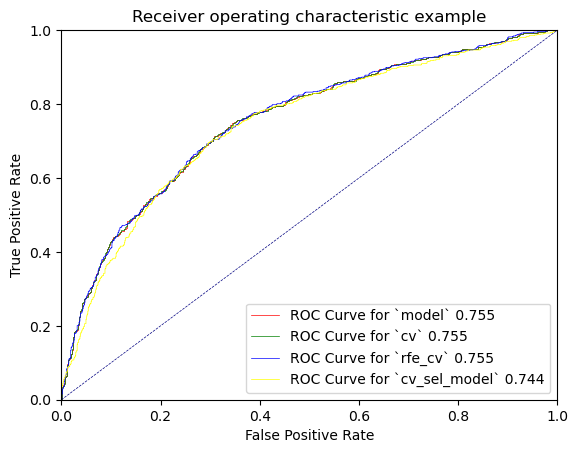

In [37]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for `cv_sel_model` {:.3f}'.format(roc_index_cv_sel_model), color='yellow', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [38]:
import pickle
lr_best = cv_sel_model
roc_index_lr_best = roc_index_cv_sel_model
tpr_lr_best = tpr_cv_sel_model
fpr_lr_best = fpr_cv_sel_model
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)

In [40]:
import pandas as pd

# Convert the NumPy array to a Pandas DataFrame
covid_positive_df = pd.DataFrame(covid_positive_individuals, columns=X.columns)

# Provide the general characteristics of these individuals
characteristics = covid_positive_df.describe()
print(characteristics)

# Set the probability threshold
threshold = 0.5

# Predict probabilities for the positive class (1)
y_pred_proba = cv_sel_model.predict_proba(X_test_sel_model)[:, 1]

# Classify individuals based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Identify individuals predicted as "COVID positive"
covid_positive_individuals = X_test[y_pred == 1]

# Provide the general characteristics of these individuals
characteristics = covid_positive_individuals.describe()
print(characteristics)


           height      weight   insurance   immigrant  contacts_count  \
count  685.000000  685.000000  685.000000  685.000000      685.000000   
mean    -0.212718    0.318678    0.173401   -0.177617        0.114213   
std      1.024549    1.110724    0.725657    0.712582        1.076603   
min     -4.915357   -1.690377   -2.905426   -0.340347       -1.171761   
25%     -0.896714   -0.520421    0.344184   -0.340347       -0.713758   
50%     -0.166052    0.148125    0.344184   -0.340347       -0.255755   
75%      0.381945    0.900240    0.344184   -0.340347        0.660251   
max      2.573932    3.992267    0.344184    2.938177        2.034260   

       house_count  gender_female  gender_male  gender_other    age_0_10  ...  \
count   685.000000     685.000000   685.000000    685.000000  685.000000  ...   
mean      0.141657       0.194568    -0.198612      0.042269   -0.028696  ...   
std       1.058022       0.991454     0.989913      1.368225    0.694087  ...   
min      -1.192953

AttributeError: 'numpy.ndarray' object has no attribute 'describe'